In [1]:
import matplotlib.pyplot as plt

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

plt.rc('font', family=font_name)

fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [2]:
from matplotlib import pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import squarify
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from wordcloud import WordCloud

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Market_Basket_Optimisation.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.shape


(7501, 20)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [11]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


###Word Cloud

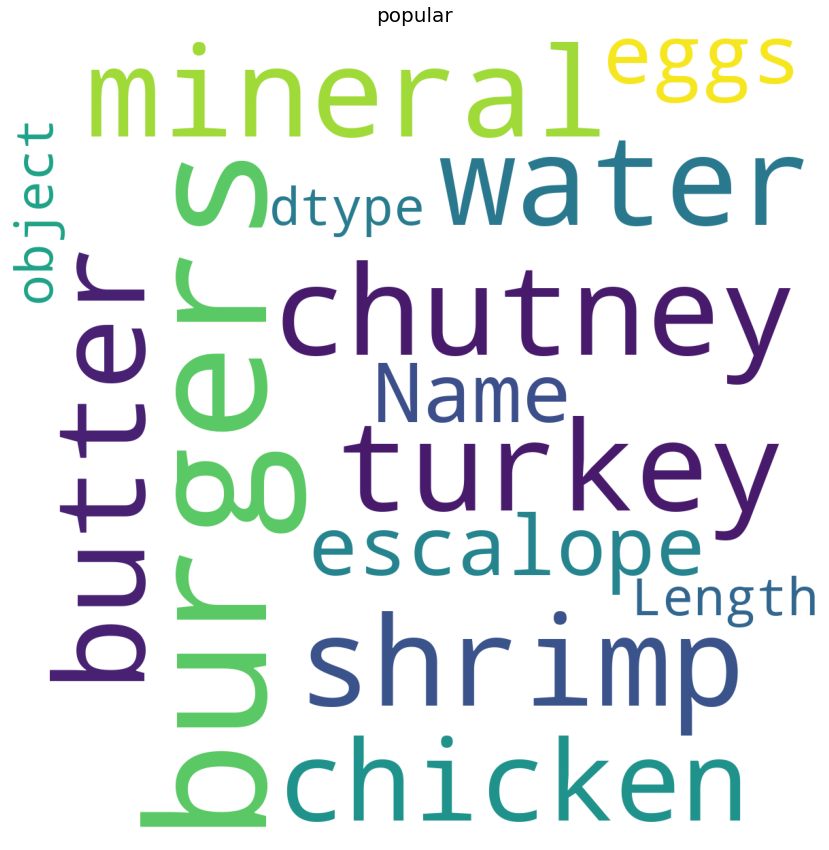

In [13]:
plt.rcParams['figure.figsize'] = (15, 15)

wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)

plt.axis('off')
plt.title('popular',fontsize = 20)
plt.show()

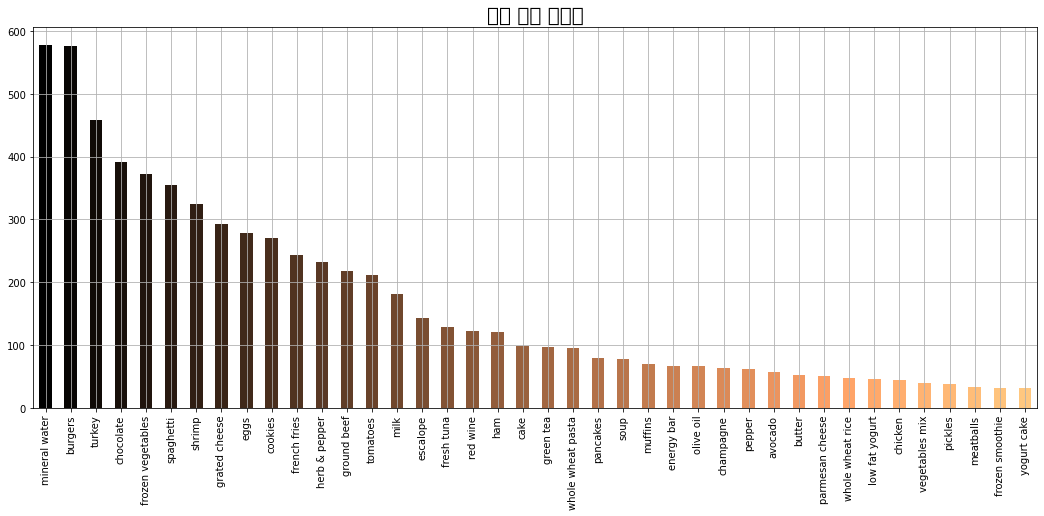

In [14]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))

data[0].value_counts().head(40).plot.bar(color=color)
plt.title('인기 판매 상품들', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [15]:
y = data[0].value_counts().head(50).to_frame()
y.index

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'dessert wine', 'hot dogs', 'honey',
       'candy bars', 'cereals', 'strawberries', 'yams', 'oil', 'tomato sauce'],
      dtype='object')

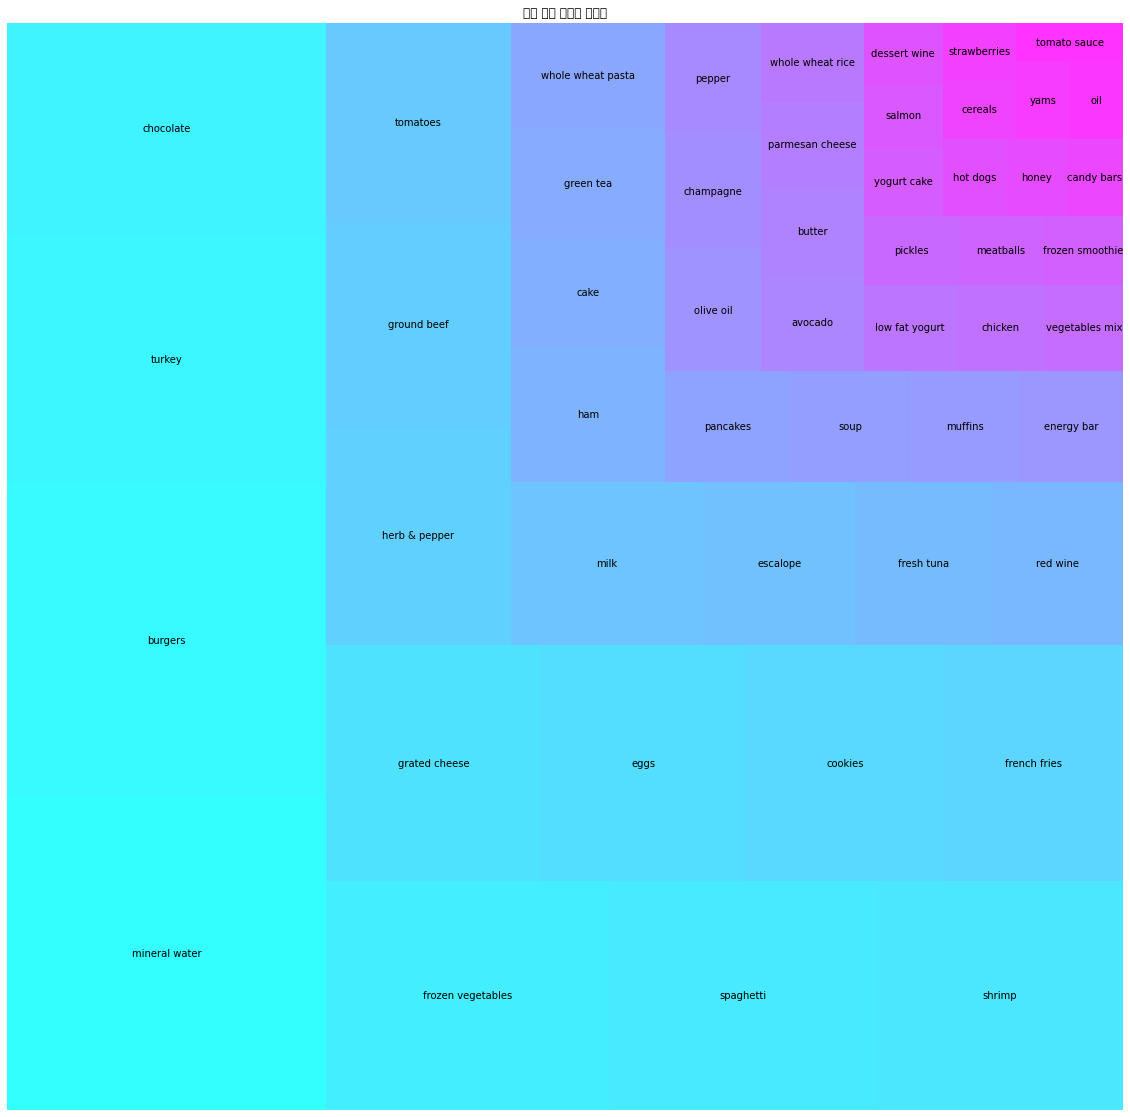

In [17]:
plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))

squarify.plot(sizes=y.values, label=y.index, alpha=.8, color=color)

plt.title('인기 판매 상품들 트리맵')
plt.axis('off')
plt.show()

In [18]:
# 결측값과 중복값은 의미가 없을 것이라고 판단됨 > 지우거나 처리해 줄 필요가 없다.

In [19]:
# 동일한 크기의 리스트에 각 손님들의 쇼핑 목록을 넣기
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# numpy array 로 변환
trans = np.array(trans)
print(trans.shape)

(7501, 20)


### Transaction Encoder 적용

In [20]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns=te.columns_)


data.shape

(7501, 121)

In [21]:
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [22]:
len(y.index)

50

In [23]:
data = data[y.index]

## 연관규칙분석

#### apriori 알고리즘

In [24]:
# 최소 지지도 0.01
frequent_itemsets = apriori(data, min_support=0.01, use_colnames=True)

frequent_itemsets.sort_values("support", ascending=False)

,support,itemsets
0,0.238368,(mineral water)
8,0.179709,(eggs)
5,0.174110,(spaghetti)
10,0.170911,(french fries)
3,0.163845,(chocolate)
...,...,...
135,0.010265,"(red wine, spaghetti)"
106,0.010132,"(chocolate, soup)"
218,0.010132,"(ground beef, mineral water, eggs)"
125,0.010132,"(frozen vegetables, low fat yogurt)"


In [25]:
# pandas apply 이용
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))

frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
...,...,...,...
218,0.010132,"(ground beef, mineral water, eggs)",3
219,0.013065,"(milk, mineral water, eggs)",3
220,0.011065,"(milk, mineral water, ground beef)",3
221,0.010532,"(chocolate, spaghetti, eggs)",3


In [26]:
# 발생 횟수가 3이고 지지도가 0.01 이상인 경우 필터링

frequent_itemsets[(frequent_itemsets['length'] == 3) & (frequent_itemsets['support'] >= 0.01)]


,support,itemsets,length
206,0.015865,"(chocolate, spaghetti, mineral water)",3
207,0.013465,"(chocolate, mineral water, eggs)",3
208,0.010932,"(chocolate, mineral water, ground beef)",3
209,0.013998,"(chocolate, milk, mineral water)",3
210,0.011998,"(frozen vegetables, mineral water, spaghetti)",3
211,0.011065,"(milk, frozen vegetables, mineral water)",3
212,0.014265,"(spaghetti, mineral water, eggs)",3
213,0.010132,"(spaghetti, mineral water, french fries)",3
214,0.017064,"(spaghetti, mineral water, ground beef)",3
215,0.015731,"(milk, spaghetti, mineral water)",3


In [27]:
# 발생 횟수가 2이고 지지도가 0.01 이상인 경우 필터링

frequent_itemsets[(frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.01)]


,support,itemsets,length
47,0.024397,"(mineral water, burgers)",2
48,0.019197,"(turkey, mineral water)",2
49,0.052660,"(chocolate, mineral water)",2
50,0.035729,"(frozen vegetables, mineral water)",2
51,0.059725,"(spaghetti, mineral water)",2
...,...,...,...
201,0.011865,"(cake, pancakes)",2
202,0.016398,"(pancakes, green tea)",2
203,0.011865,"(chicken, green tea)",2
204,0.011199,"(frozen smoothie, green tea)",2


In [28]:
# 발생 횟수가 3이고 지지도가 0.01 이상인 경우 필터링

frequent_itemsets[(frequent_itemsets['length'] == 1) & (frequent_itemsets['support'] >= 0.01)]


,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


### Association Rules

In [29]:
# association_rules 이용, metric 은 confidence, min_threshold=0.1

df_ar = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1 )

df_ar.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
297,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
305,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552
259,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937
270,"(milk, frozen vegetables)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136
30,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
...,...,...,...,...,...,...,...,...,...
0,(mineral water),(burgers),0.238368,0.087188,0.024397,0.102349,1.173883,0.003614,1.016889
236,(milk),(low fat yogurt),0.129583,0.076523,0.013198,0.101852,1.330994,0.003282,1.028201
303,(milk),"(mineral water, eggs)",0.129583,0.050927,0.013065,0.100823,1.979774,0.006466,1.055491
35,(mineral water),(low fat yogurt),0.238368,0.076523,0.023997,0.100671,1.315565,0.005756,1.026851
